In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom top layers for your PCG classification task
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up data generators for training, validation, and test sets
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    r"E:\MAIN PROJECT\FILTERD CODES\data splitting\scalogram data\PCG_scalogram_divided",
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary',
    shuffle=False,
    subset='training'
)

val_generator = datagen.flow_from_directory(
    r"E:\MAIN PROJECT\FILTERD CODES\data splitting\scalogram data\PCG_scalogram_divided",
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary',
    shuffle=False,
    subset='validation'
)

# Fine-tune the model on your PCG data

Found 2782 images belonging to 2 classes.
Found 695 images belonging to 2 classes.


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [5]:
# Define a callback to save the model after each epoch
checkpoint_callback = ModelCheckpoint(
    filepath="E:\\MAIN PROJECT\\FILTERD CODES\\data splitting\\trained models\\VGG16\\VGG16_PCG\\VGG16_pcg_epoch_{epoch}.keras",  # Save the model with the epoch number in the filename
    save_weights_only=False,  # Save the entire model (architecture, weights, and training configuration)
    save_best_only=False,  # Save the model after each epoch, regardless of performance
    monitor='val_accuracy',  # Quantity to monitor on the validation set
    mode='man',  # Mode can be 'min' or 'max' depending on whether you want to minimize or maximize the monitored quantity
    verbose=1
)

# Define a callback for early stopping
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',  # Quantity to monitor on the validation set
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored quantity
    verbose=1
)

In [6]:
# Include both callbacks in model training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,  # Adjust the number of epochs as needed
    callbacks=[checkpoint_callback, early_stopping_callback]
) # Adjust the number of epochs based on your needs

Epoch 1/100
44/44 [==============================] - ETA: 0s - loss: 1.2102 - accuracy: 0.6880
Epoch 1: saving model to E:\MAIN PROJECT\FILTERD CODES\data splitting\trained models\VGG16\VGG16_PCG\VGG16_pcg_epoch_1.keras
44/44 [==============================] - 281s 6s/step - loss: 1.2102 - accuracy: 0.6880 - val_loss: 0.9155 - val_accuracy: 0.7108
Epoch 2/100
44/44 [==============================] - ETA: 0s - loss: 0.6663 - accuracy: 0.7110
Epoch 2: saving model to E:\MAIN PROJECT\FILTERD CODES\data splitting\trained models\VGG16\VGG16_PCG\VGG16_pcg_epoch_2.keras
44/44 [==============================] - 278s 6s/step - loss: 0.6663 - accuracy: 0.7110 - val_loss: 0.6065 - val_accuracy: 0.7108
Epoch 3/100
44/44 [==============================] - ETA: 0s - loss: 0.6135 - accuracy: 0.7110
Epoch 3: saving model to E:\MAIN PROJECT\FILTERD CODES\data splitting\trained models\VGG16\VGG16_PCG\VGG16_pcg_epoch_3.keras
44/44 [==============================] - 277s 6s/step - loss: 0.6135 - accuracy:

In [5]:
import re

# Open the text document in read mode
with open(r"E:\MAIN PROJECT\FILTERD CODES\data splitting\trained models\VGG16\VGG16_PCG\VGG16_PCG.txt", 'r') as file:
    # Read the entire contents of the file
    text = file.read()

# Regular expression pattern to match accuracy values
pattern1 = r"accuracy: (\d+\.\d+)"
pattern2 = r"val_accuracy: (\d+\.\d+)"
pattern3 = r"loss: (\d+\.\d+)"
pattern4 = r"val_loss: (\d+\.\d+)"


# Find all accuracy values using regex
train_accuracy1 = re.findall(pattern1, text)
val_accuracy = re.findall(pattern2, text)
train_loss1 = re.findall(pattern3, text)
val_loss = re.findall(pattern4, text)

# Convert accuracy values to float
train_accuracy1 = [float(value) for value in train_accuracy1]
val_accuracy = [float(value) for value in val_accuracy]
train_loss1 = [float(value) for value in train_loss1]
val_loss = [float(value) for value in val_loss]


In [6]:
train_accuracy=[]
train_loss=[]
i=-2
while i<31:
    train_accuracy.append(train_accuracy1[i+3])
    train_loss.append(train_loss1[i+3])
    i+=3


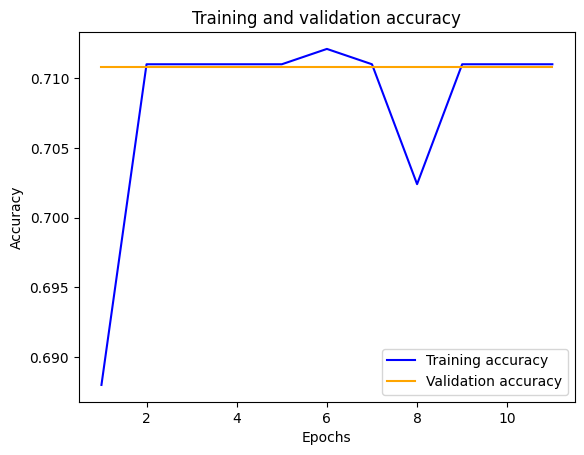

In [7]:
import matplotlib.pyplot as plt
# Plot the epoch vs accuracy curve
epochs = range(1, 12)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

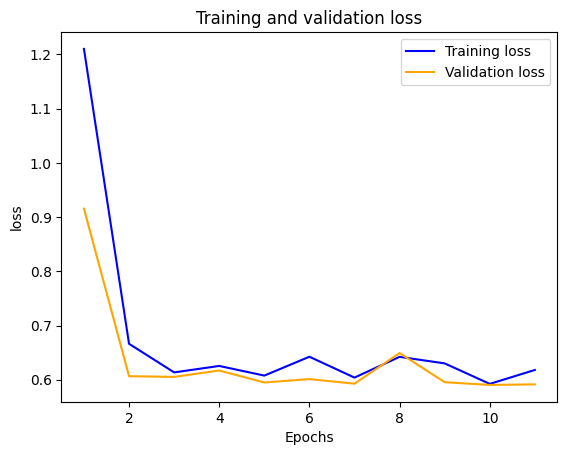

In [8]:
import matplotlib.pyplot as plt
# Plot the epoch vs accuracy curve
epochs = range(1, 12)
plt.plot(epochs, train_loss ,'b', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
from tensorflow.keras.models import load_model
VGG16_PCG = load_model(r"E:\MAIN PROJECT\FILTERD CODES\data splitting\trained models\VGG16\VGG16_PCG\VGG16_pcg_epoch_7.keras")

44/44 [==============================] - 211s 5s/step


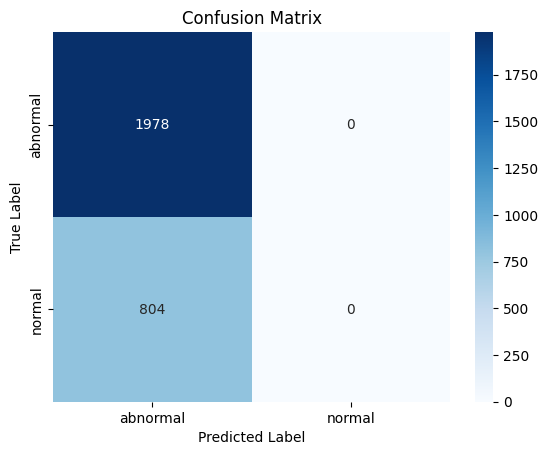

Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1978
           1       0.00      0.00      0.00       804

    accuracy                           0.71      2782
   macro avg       0.36      0.50      0.42      2782
weighted avg       0.51      0.71      0.59      2782



c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have a trained model named 'model' and validation generator 'val_generator'

# Predict the labels on the validation set
y_true_train = train_generator.classes
y_pred_prob_train = model.predict(train_generator)
y_pred_train = np.round(y_pred_prob_train)  # Convert probabilities to binary predictions

# Calculate the confusion matrix
cm_train = confusion_matrix(y_true_train, y_pred_train)

# Visualize the confusion matrix with values
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['abnormal', 'normal'], yticklabels=['abnormal', 'normal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true_train, y_pred_train))


11/11 [==============================] - 54s 5s/step


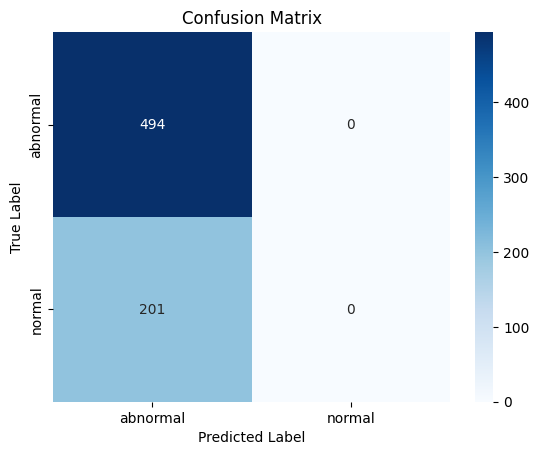

Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       494
           1       0.00      0.00      0.00       201

    accuracy                           0.71       695
   macro avg       0.36      0.50      0.42       695
weighted avg       0.51      0.71      0.59       695



c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have a trained model named 'model' and validation generator 'val_generator'

# Predict the labels on the validation set
y_true_val = val_generator.classes
y_pred_prob_val = model.predict(val_generator)
y_pred_val = np.round(y_pred_prob_val)  # Convert probabilities to binary predictions

# Calculate the confusion matrix
cm_val = confusion_matrix(y_true_val, y_pred_val)

# Visualize the confusion matrix with values
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=['abnormal', 'normal'], yticklabels=['abnormal', 'normal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true_val, y_pred_val))


In [ ]:
# Assuming the classes are labeled as 0 and 1
class_1_probabilities = y_pred_prob_val[:, 0]  # Probabilities for class 0
class_0_probabilities = 1 - class_1_probabilities  # Probabilities for class 1

# Print the probabilities for both classes
print("Probabilities for class 1:", class_1_probabilities)
print("Probabilities for class 0:", class_0_probabilities)

Probabilities for class 1: [0.23882438 0.3415127  0.2790295  0.31393516 0.23508224 0.37087756
 0.166221   0.2786056  0.23604712 0.32363    0.15517326 0.11336032
 0.24461634 0.1354806  0.34322357 0.21633478 0.2919265  0.34139478
 0.17322928 0.35050994 0.12546961 0.18101265 0.45866865 0.50444967
 0.2931885  0.31093642 0.11847299 0.18664172 0.16217637 0.2645072
 0.14106466 0.19991648 0.38770932 0.27838233 0.14432725 0.16143732
 0.3990232  0.30030584 0.27077514 0.27310452 0.15129833 0.33284032
 0.47014102 0.09126301 0.48800716 0.12335597 0.1437386  0.19717292
 0.28494102 0.46088052 0.17029187 0.2161147  0.16651638 0.25735217
 0.38124108 0.7325649  0.12984832 0.23136751 0.16959974 0.2206445
 0.15770437 0.25150165 0.20609371 0.12092717 0.17504963 0.44998682
 0.14939441 0.3684186  0.09777751 0.30806407 0.25232208 0.20220017
 0.10875954 0.28470904 0.7085858  0.6648792  0.22982474 0.4197287
 0.26564467 0.1829316 ]
Probabilities for class 0: [0.76117563 0.6584873  0.7209705  0.68606484 0.7649177

In [14]:
print(cm_train,cm_val)

[[1978    0]
 [ 804    0]] [[494   0]
 [201   0]]


In [17]:
def calculate_metrics(confusion_matrix):
    # Extract values from confusion matrix
    TP = confusion_matrix[0][0]
    FP = confusion_matrix[1][0]
    FN = confusion_matrix[0][1]
    TN = confusion_matrix[1][1]
    
    # Calculate precision
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    
    # Calculate recall (sensitivity)
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    
    # Calculate F1 score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    # Calculate accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0

    # Calculate specificity
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    
    return precision, recall, f1_score, accuracy,specificity

In [19]:
cm_fused_val= [[494 ,  0],[201 ,  0]]
# Calculate metrics
val_precision, val_recall, val_f1_score, val_accuracy, val_specificity = calculate_metrics(cm_fused_val)

# Print results
print("Precision:", val_precision)
print("Recall (Sensitivity):", val_recall)
print("F1 Score:", val_f1_score)
print("Accuracy:", val_accuracy)
print("specificity:",val_specificity)

Precision: 0.7107913669064748
Recall (Sensitivity): 1.0
F1 Score: 0.8309503784693019
Accuracy: 0.7107913669064748
specificity: 0.0


In [18]:
cm_ecg_train= [[1978  ,  0],[ 804   , 0]]
# Calculate metrics
train_precision, train_recall, train_f1_score, train_accuracy, train_specificity = calculate_metrics(cm_ecg_train)

# Print results
print("Precision:", train_precision)
print("Recall (Sensitivity):", train_recall)
print("F1 Score:", train_f1_score)
print("Accuracy:", train_accuracy)
print("specificity:",train_specificity)

Precision: 0.710999281092739
Recall (Sensitivity): 1.0
F1 Score: 0.83109243697479
Accuracy: 0.710999281092739
specificity: 0.0


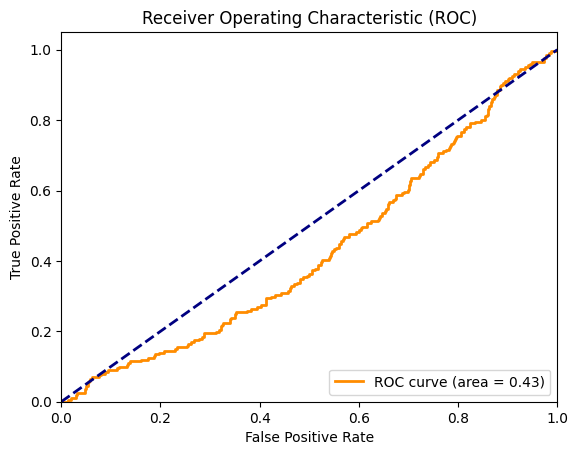

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true_val, y_pred_prob_val)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

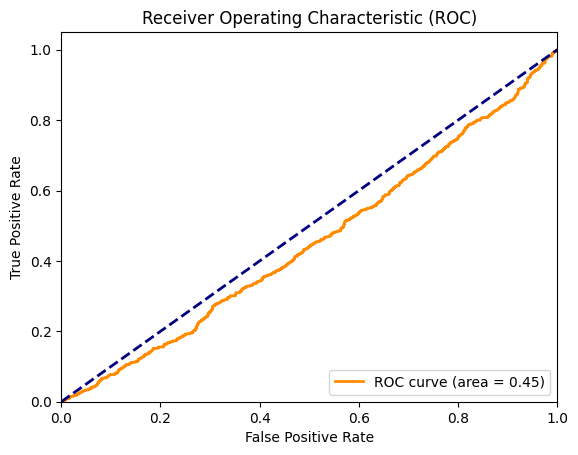

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Compute ROC curve and ROC area
y_true_train=train_generator.classes
fpr, tpr, thresholds = roc_curve(y_true_train, y_pred_prob_train)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

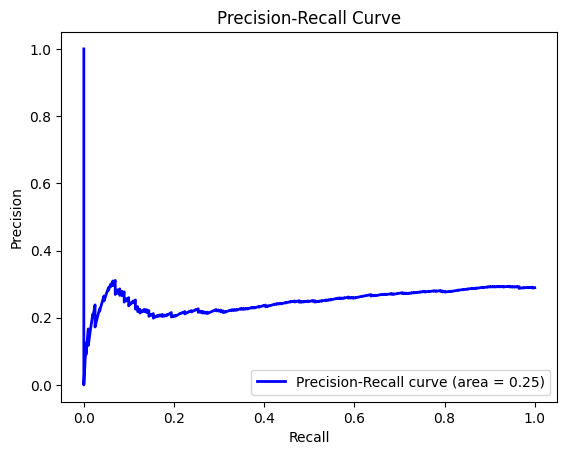

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc


# Calculate precision and recall
y_true_val=val_generator.classes
precision, recall, thresholds = precision_recall_curve(y_true_val, y_pred_prob_val)

# Compute area under the curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

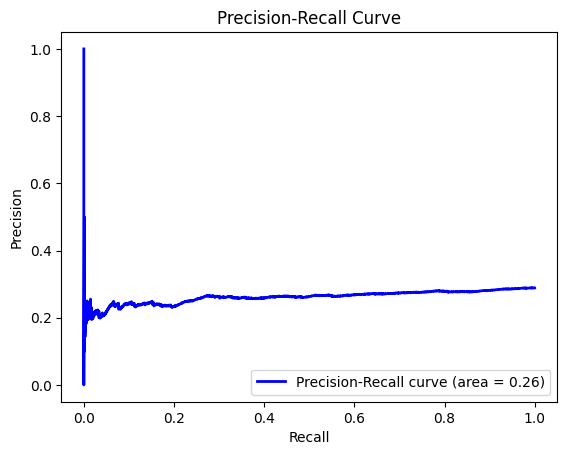

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc


# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_true_train, y_pred_prob_train)

# Compute area under the curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()